Nesta atividade vamos estimar o erro da seguinte forma:
\begin{equation}
    \epsilon  = |I_e - I_N |
\end{equation}
Onde I(N) é o valor da integral obtido dividindo o intervalo de integração em N partes e Iexata é a solução analítica para a integral.

Um teste simples para verificar quando a resposta está convergindo é aumentar N e calcular o erro a cada incremento no seu valor.  Se $\Delta x$ é a fatia sobre o eixo x após dividi-lo em N partes. Espera-se que o erro seja proporcional a $\Delta x$.

Etapas:

Escreva um programa que calcule o erro do método do trapézio em função de N. Este programa deve usar 10 valores diferentes de N: 2²,...,2²⁰. 

Para cada valor de N corresponde um $\Delta x$, calcule quanto vale a integral para este $\Delta x$ e guarde o erro em relação à solução exata em uma lista. Assim, você poderá calcular o erro com relação à solução exata para as diferentes partições do intervalo, portanto, para cada $\Delta x$.

Escreva um programa que calcule o erro do método de Simpson em função de N de maneira similar ao do exercício anterior. Lembre que o método de Simpson requer que N seja par. 


Considere a função a ser integrada:
\begin{equation}
    f\left ( x \right ) = \frac{1}{x^{2}+1}
\end{equation}
e o intervalo de integração de $x=-3$ a $x=3$. 

Determine a inclinação no gráfico $log(\epsilon )$  por  $log($\Delta x$)$


O cálculo da Integração pelo método do Trapézio é dado por: 
\begin{equation}
    \int_{a}^{b}f\left ( x \right )dx \approx \sum_{i=1}^{N}\frac{f\left ( x_i \right) + f\left ( x_i-_1 \right )}{2}\times \Delta x
\end{equation}

Enquanto o cálcuolo da Integração pelo método de Simpson é:
\begin{equation}
    \int_{a}^{b}f\left ( x \right )dx \approx \frac{h}{3}\times \left [ f\left ( a \right )  + f\left ( b \right ) + 4\times \sum_{i impar}^{} f\left ( a +ih \right ) + 2\sum_{i par}^{}f\left ( a + ih \right )\right ]
\end{equation}
sendo:
\begin{equation}
    \Delta x = \left ( \frac{b - a}{N} \right )
\end{equation}
\begin{equation}
    h = \left ( \frac{b - a}{N} \right )
\end{equation}

O erro de integração é obtido subtraíndo o valor da integral exata pelo encontrado pelos métodos acima:
\begin{equation}
    \epsilon  = |I_e - I_N |
\end{equation}

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Methods


In [ ]:
def funcao(x):
 res = 1/((x**2) + 1)
 return res

def trapezio (a, b, n):
  dx = (b-a)/n
  som = 0
  for i in range(1, n):
    som += funcao(a+(dx*i))
  flinha = ((funcao(a) + funcao(b))/2 + som)*dx
  return flinha

def erro_metodo (a, b, n, metodo):
  integral_exata = 2.4980915447965089
  erro = abs(integral_exata - metodo(a, b, n))

  return erro

def lista_erros (a, b, metodo):
  integrais = []
  erro = []
  for i in range(2, 22, 2):
    n = 2**i
    integrais.append(np.log((b-a)/n))
    erro.append(np.log(erro_metodo(a, b, n, metodo)))

  return erro, integrais

def simpson (a, b, n):
  h = (b-a)/n
  soma_impar = 0
  soma_par = 0
  aux = 0

  for i in range(1, n):
    aux = funcao((h*i)+a)
    if i % 2 == 0:
      soma_par += aux
    else:
      soma_impar += aux

  flinha = (h/3)*((funcao(a) + funcao(b)) + (4*soma_impar) + (2*soma_par))
  return flinha

def plot (trapezio, simpson, integrais):
  plt.plot(integrais, trapezio, color='red', label='Trapézio')
  plt.plot(integrais, simpson, color='black', label='Simpson')
  plt.legend()
  plt.title('Erro Integração')
  plt.xlabel('log(Δx)')
  plt.ylabel('log(ε)')
  plt.show()

def inclinacao (erro_trapezio, erro_simpson, integrais):
  inc_trapezio = round((erro_trapezio[6] - erro_trapezio[5])/(integrais[6]-integrais[5]))
  inc_simpson = round((erro_simpson[3] - erro_simpson[2])/(integrais[3]-integrais[2]))
  print(f'A inclinação da reta p/ o método de Trapézio é {inc_trapezio}')
  print(f'A inclinação da reta p/ o método de Simpson é {inc_simpson}')

Main

A inclinação da reta p/ o método de Trapézio é 2
A inclinação da reta p/ o método de Simpson é 4


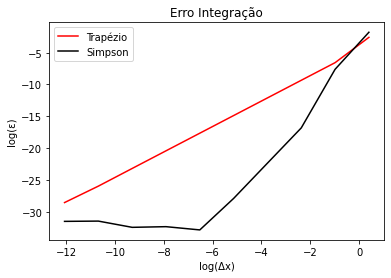

In [ ]:
erro_trapezio, integrais = lista_erros(-3, 3, trapezio)
erro_simpson, integrais = lista_erros(-3, 3, simpson)
inclinacao(erro_trapezio, erro_simpson, integrais)
plot(erro_trapezio, erro_simpson, integrais)